In [2]:
!pip install langchain langgraph


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.2 MB/s eta 0:00:00


In [5]:
!pip install langchain-community --upgrade
!pip install langchain --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [6]:
from langgraph.graph import StateGraph
from langchain.chat_models import ChatOpenAI

<ipython-input-8-ebbf162ecc69>:7: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(api_key=openai_api_key, model="gpt-4o-mini")


In [27]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Dict

# Define the state object that tracks the workflow
class InvoiceState(TypedDict):
    invoice_id: str
    po_number: str
    is_paid: bool
    payment_method: str
    payment_date: str
    exception_status: str
    action_taken: str

# Initialize the StateGraph
builder = StateGraph(InvoiceState)

# Define nodes for each step in the workflow

In [28]:
def imagenow_check(state: InvoiceState):
    print("\n=== Imagenow Check ===")
    # Simulate checking the invoice in Imagenow
    state['is_paid'] = True  # Replace with actual API query result
    print(f"Invoice {state['invoice_id']} paid status: {state['is_paid']}")
    return state

def lawson_payment_check(state: InvoiceState):
    print("\n=== Lawson Payment Check ===")
    # Simulate Lawson check for payment details
    state['payment_method'] = "Wire Transfer"
    state['payment_date'] = "2025-01-05"
    print(f"Payment Method: {state['payment_method']}, Payment Date: {state['payment_date']}")
    return state

def ivalua_check(state: InvoiceState):
    print("\n=== Ivalua Check ===")
    # Simulate checking Ivalua for transmission status
    state['exception_status'] = "Transmitted"
    print(f"Ivalua status for PO {state['po_number']}: {state['exception_status']}")
    return state

def email_personnel(state: InvoiceState):
    print("\n=== Email Personnel ===")
    # Simulate emailing the appropriate person based on exception status
    state['action_taken'] = f"Email sent for exception: {state['exception_status']}"
    print(state['action_taken'])
    return state

def update_notes(state: InvoiceState):
    print("\n=== Update Notes ===")
    # Simulate updating notes in Imagenow/Ivalua
    state['action_taken'] += " | Notes updated in Imagenow/Ivalua"
    print(state['action_taken'])
    return state

In [29]:
# Define conditional transitions

def check_payment_status(state: InvoiceState):
    print("\n=== Conditional Check: Payment Status ===")
    if state['is_paid']:
        return "lawson_payment_check"
    elif len(state['po_number']) == 11:
        return "ivalua_check"
    else:
        return "lawson_exception_check"

def ivalua_exception_handling(state: InvoiceState):
    print("\n=== Conditional Check: Ivalua Exception Handling ===")
    if state['exception_status'] == "Transmitted":
        return "lawson_payment_check"
    else:
        return "email_personnel"

In [30]:
# Add nodes to the graph
builder.add_node("imagenow_check", imagenow_check)
builder.add_node("lawson_payment_check", lawson_payment_check)
builder.add_node("ivalua_check", ivalua_check)
builder.add_node("email_personnel", email_personnel)
builder.add_node("update_notes", update_notes)

# Add conditional edges
builder.add_conditional_edges("imagenow_check", check_payment_status, {
    "lawson_payment_check": "lawson_payment_check",
    "ivalua_check": "ivalua_check",
    "lawson_exception_check": "email_personnel",
})

builder.add_conditional_edges("ivalua_check", ivalua_exception_handling, {
    "lawson_payment_check": "lawson_payment_check",
    "email_personnel": "email_personnel",
})

# Add normal edges
builder.add_edge("lawson_payment_check", "update_notes")
builder.add_edge("email_personnel", "update_notes")


In [31]:
# Set the entry point
builder.set_entry_point("imagenow_check")

# Compile the graph
graph = builder.compile()

In [19]:
!apt-get install graphviz graphviz-dev # Install Graphviz using apt
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

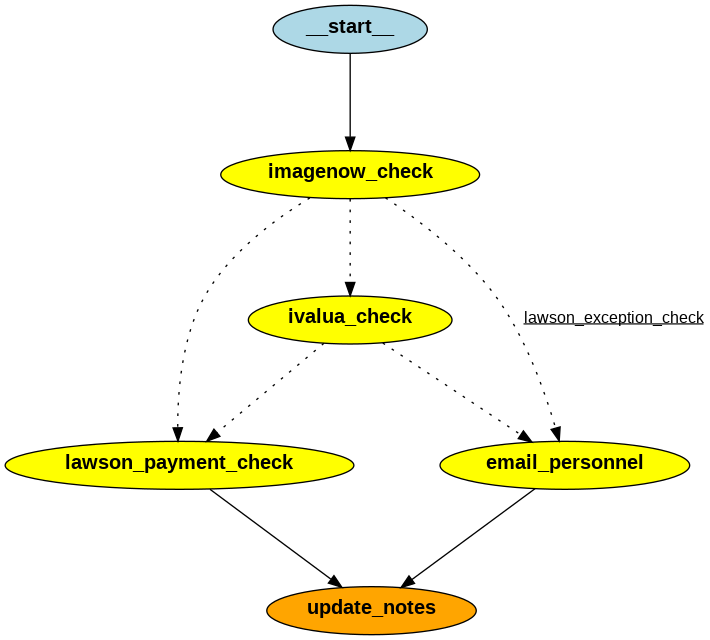

In [20]:
from IPython.display import Image

# Assuming `graph.get_graph()` provides a graph object and `.draw_png()` generates a PNG image
# Visualize the graph in a Jupyter notebook
Image(graph.get_graph().draw_png())

In [32]:
# Execute the workflow
state = InvoiceState(
    invoice_id="INV123456",
    po_number="12345678901",  # Example 11-digit PO
    is_paid=True,
    payment_method="",
    payment_date="",
    exception_status="",
    action_taken=""
)

print("\n=== Starting Workflow Execution ===")
# Use the invoke method to execute the graph with the initial state
graph.invoke(state)


=== Starting Workflow Execution ===

=== Imagenow Check ===
Invoice INV123456 paid status: True

=== Conditional Check: Payment Status ===

=== Lawson Payment Check ===
Payment Method: Wire Transfer, Payment Date: 2025-01-05

=== Update Notes ===
 | Notes updated in Imagenow/Ivalua


{'invoice_id': 'INV123456',
 'po_number': '12345678901',
 'is_paid': True,
 'payment_method': 'Wire Transfer',
 'payment_date': '2025-01-05',
 'exception_status': '',
 'action_taken': ' | Notes updated in Imagenow/Ivalua'}